In [1]:
library(ggplot2)

In [2]:
mpg2 = subset(mpg, cyl != 5 & drv %in% c('4','f') & class != '2seater')

In [4]:
base <- ggplot(mpg2, aes(displ, hwy)) +
        geom_blank() +
        xlab(NULL) +
        ylab(NULL)

##### Displaying facet with different paramaters

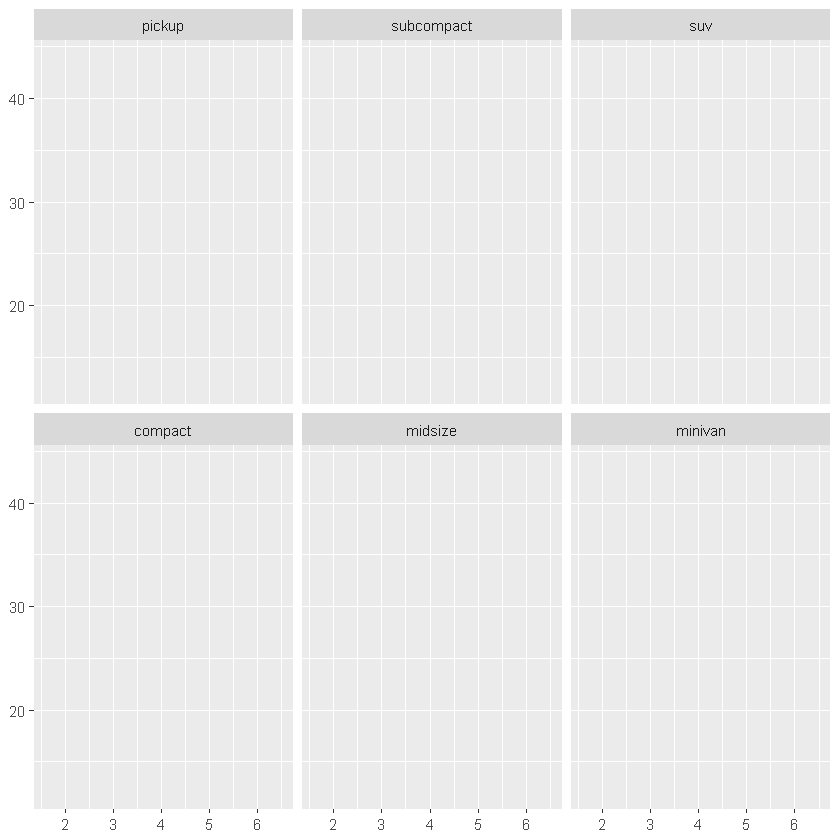

In [7]:
#base + facet_wrap(~class, ncol=3) # display the data in 3 columns
base  + facet_wrap(~class, ncol=3, as.table = F) # Highest values at the top right with as.table=F

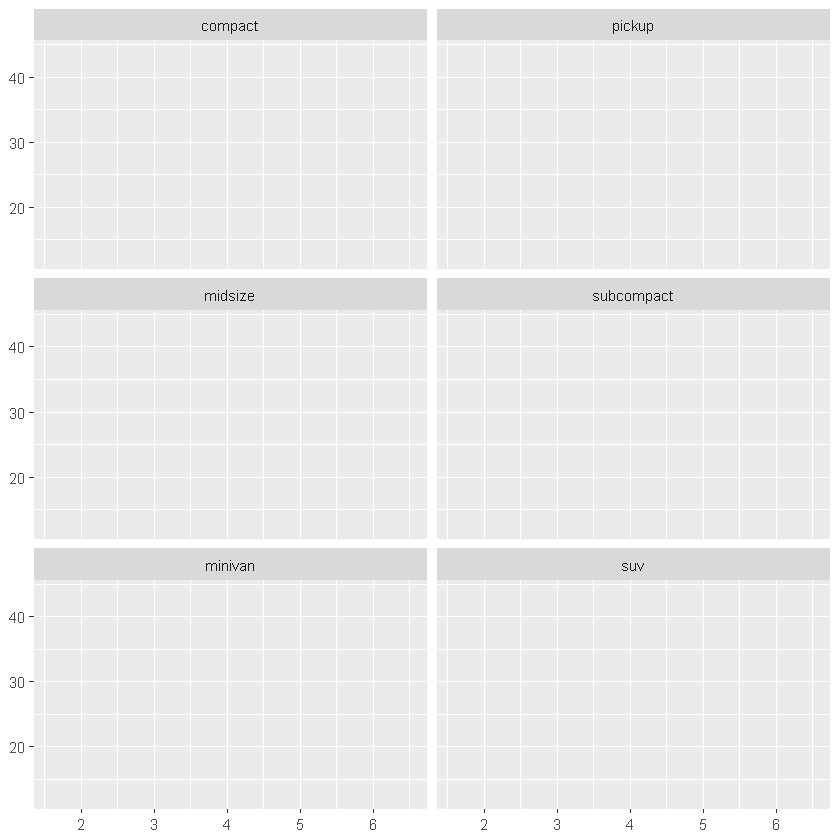

In [11]:
# base + facet_wrap(~class, nrow=3)
base + facet_wrap(~class, nrow=3, dir = "v") # Plot the panels top to bottom as they come